In [298]:
import lightgbm as lgb
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

import pprint

In [299]:
df = pd.read_csv("..\OMLT_ML\data\polynomial3.csv")
df.head()

,theta,z,u
0,-20.0,-6.08,-3.92
1,-19.5,-5.58,-4.42
2,-19.1,-5.13,-4.87
3,-18.6,-4.71,-5.29
4,-18.1,-4.32,-5.68


In [300]:
X = df["theta"]
y = df["z"]

X = X.reset_index(drop = True)
y = y.reset_index(drop = True)

X = X.to_numpy().reshape(-1, 1)
y = y.to_numpy().reshape(-1, 1)

In [301]:
X.shape, y.shape

((180, 1), (180, 1))

In [302]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

train_data_linear = lgb.Dataset(X_train, label=y_train,
                        params={
                            'linear_tree': True
                        })

train_data_normal = lgb.Dataset(X_train, label=y_train)

In [303]:
params = {
    "objective": "regression",
    "metric": "rmse",
    "max_depth": 6,
    "num_leaves": 30,
    "learning_rate": 1,
    "verbosity": -1
}

model_linear = lgb.train(params, train_data_linear)
model_normal = lgb.train(params, train_data_normal)

c:\Users\shumengl\.conda\envs\omlt\lib\site-packages\lightgbm\basic.py:154: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


In [304]:
y_pred_linear = model_linear.predict(X_test, num_iteration=model_linear.best_iteration)
y_pred_normal = model_normal.predict(X_test, num_iteration=model_normal.best_iteration)

In [305]:
print(f"Linear trees error: {round(mean_squared_error(y_test, y_pred_linear),3)}")
print(f"Normal trees error: {round(mean_squared_error(y_test, y_pred_normal),3)}")

Linear trees error: 0.116
Normal trees error: 1.028


In [306]:
y_linear = model_linear.predict(X, num_iteration=model_linear.best_iteration)
y_normal = model_normal.predict(X, num_iteration=model_linear.best_iteration)

In [307]:
y_linear

array([-4.80995678, -4.61411197, -4.45743612, -4.26159131, -4.0657465 ,
       -3.86990169, -3.71322584, -3.51738103, -3.32153621, -3.1256914 ,
       -2.96901555, -2.77317074, -2.57732593, -2.38148112, -2.22480527,
       -2.02896046, -1.83311565, -1.63727084, -1.48059499, -1.28475018,
       -1.08890536, -0.89306055, -0.71680022, -0.5327061 , -0.34469508,
       -0.16060096,  0.02741006,  0.21150418,  0.3995152 ,  0.58360932,
        0.77162034,  0.95571447,  1.14372549,  0.72183879,  0.64734117,
        0.57439559,  0.50145001,  0.97599744,  0.89378309,  0.80981949,
        0.80390129,  0.7101698 ,  0.61720148,  0.0191293 , -0.13286583,
       -0.28518096, -0.43557614, -0.58917122, -0.7395664 , -0.7405155 ,
       -1.02968862, -1.32501436, -1.54204003, -1.59900282, -1.65477889,
       -1.71174169, -1.76751775, -2.06468136, -2.11865859, -2.17378428,
       -2.5671966 , -2.59678263, -2.62575228, -3.54149173, -3.484747  ,
       -3.4256379 , -3.37835062, -3.31924152, -3.26013242, -3.68

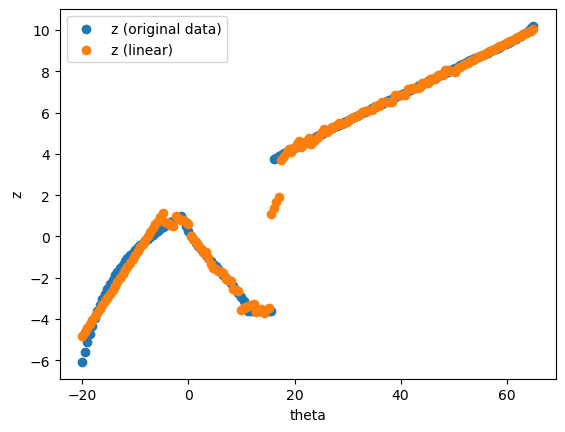

In [308]:
# plotting results
plt.scatter(X, y, label = 'z (original data)')
plt.scatter(X, y_linear, label = 'z (linear)')
# plt.scatter(X, y_normal, label = 'z (normal)')
plt.ylabel('z')
plt.xlabel('theta')
plt.legend()
plt.show()